In [1]:
import pandas as pd

**Загрузите файл HR.csv в pandas dataframe**

In [2]:
df = pd.read_csv('HR.csv')
df['Work_accident'] = df['Work_accident'].astype(bool)
df['left'] = df['left'].astype(bool)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  bool   
 6   left                   14999 non-null  bool   
 7   promotion_last_5years  14999 non-null  bool   
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: bool(3), float64(2), int64(3), object(2)
memory usage: 864.3+ KB


**Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [3]:
desc = df.describe()
desc.loc['median'] = df.median(numeric_only=True)
desc.loc['mode'] = df.mode().iloc[0]
desc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000
median,0.640000,0.720000,4.000000,200.000000,3.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000


In [4]:
df.describe(include='object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


**Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.**  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

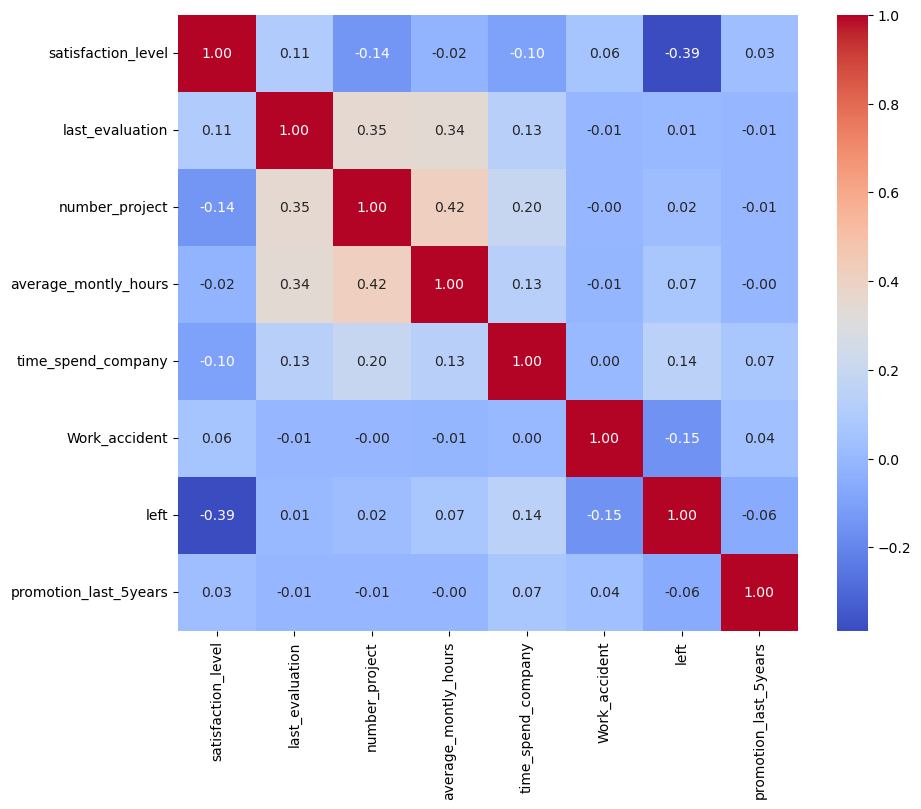

In [6]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Самые скореллированные переменные:
* number_project, average_montly_hours (0.42)
* last_evaluation, number_project (0.35)

Наименее скореллированные переменные:
* left, satisfaction_level (-0.39)
* left, Work_accident (-0.15)

**Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [7]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Наиболее многочисленные департаменты - sales и technical.

**Показать распределение сотрудников по зарплатам.**

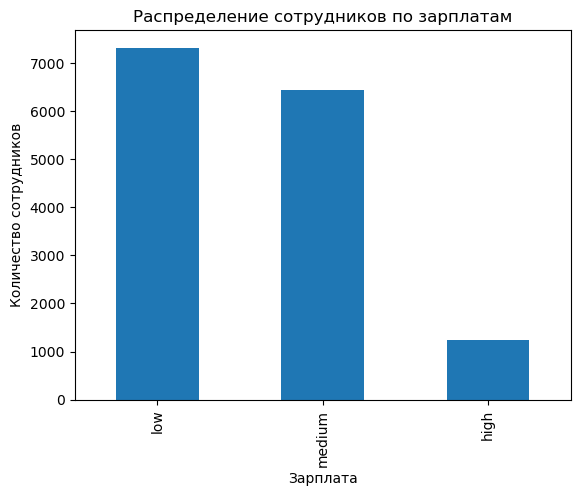

In [8]:
df['salary'].value_counts().plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

Большинство сотрудников имеют среднюю или низкую зарплату

**Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

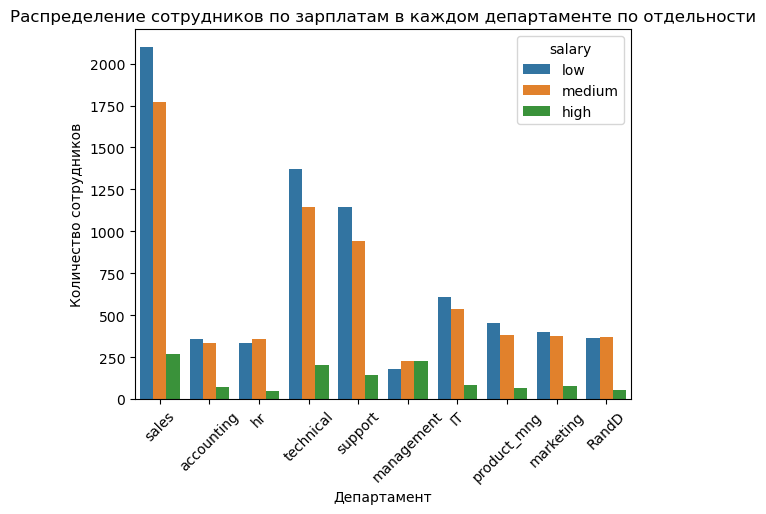

In [9]:
sns.countplot(x='department', hue='salary', data=df)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте по отдельности')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

В каждом департаменте преобладают сотрудники со средней и низкой зарплатой.

**Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [10]:
from scipy import stats

In [11]:
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

t_stat, p_value = stats.ttest_ind(high_salary, low_salary)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.7288680398062308, P-value: 0.4661023478267259


P-value: 0.4661023478267259 > 0.05 => нельзя утверждать, что что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

**Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):** 

● Доля сотрудников с повышением за последние 5 лет 

● Средняя степень удовлетворенности 

● Среднее количество проектов

In [12]:
left_df = df[df['left'] == True]
not_left_df = df[df['left'] == False]

promotion_left = left_df['promotion_last_5years'].mean()
promotion_not_left = not_left_df['promotion_last_5years'].mean()

satisfaction_left = left_df['satisfaction_level'].mean()
satisfaction_not_left = not_left_df['satisfaction_level'].mean()

projects_left = left_df['number_project'].mean()
projects_not_left = not_left_df['number_project'].mean()

print(f"Доля сотрудников с повышением за последние 5 лет (уволившиеся): {promotion_left:.2f}\nДоля сотрудников с повышением за последние 5 лет (не уволившиеся): {promotion_not_left:.2f}\n")
print(f"Средняя степень удовлетворенности (уволившиеся): {satisfaction_left:.2f}\nСредняя степень удовлетворенности (не уволившиеся): {satisfaction_not_left:.2f}\n")
print(f"Среднее количество проектов (уволившиеся): {projects_left:.2f}\nСреднее количество проектов (не уволившиеся): {projects_not_left:.2f}\n")

Доля сотрудников с повышением за последние 5 лет (уволившиеся): 0.01
Доля сотрудников с повышением за последние 5 лет (не уволившиеся): 0.03

Средняя степень удовлетворенности (уволившиеся): 0.44
Средняя степень удовлетворенности (не уволившиеся): 0.67

Среднее количество проектов (уволившиеся): 3.86
Среднее количество проектов (не уволившиеся): 3.79



Уволившиеся сотрудники реже получали повышение, менее удовлетворены и имели большее количество проектов

**Разделить данные на тестовую и обучающую выборки и построить модель LDA**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop(columns=['left', 'department', 'salary'])
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7533333333333333